In [6]:
import numpy as np
from hamming_distance_distribution import hamming_distance_distribution, hamming_distance_distribution_exhaustive
import matplotlib.pyplot as plt
import time

In [7]:
# --------- Parameters ---------
N_repeat = 200      # how many samples per neglection threshold

N = 5               # number of users
M = 4               # length of id-sequence for every user
K = 100              # number of antennas
xi = 0              # std of thermal noise

which_ctl_fct = 0   # 0: linear control function, 1: optimal control function
N_thres = 50        # how many different neglection thresholds between 0 and 1

neglection_rule = 1 # 0: only smallest matrix element, 1: neglect below threshold, 2: neglect a certain number of couplings, 3: maximum degree given for all nodes
method = 1          # 0: compute complete annealing process, 1: do exhaustive search
# only relevant, if method == 0:
nb_pts_gap = 20     # number of points for the gap computation
nb_pts_time = 30    # number of points for resolution of the time dependant Schrodinger's equation
epsilon = 0.1       # precision level for the control function (valid for both, linear and optimal scheduling)
gamma = 1           # strength of the transverse field, irrelevant for us 


# runtime for these settings
T_hdd = 9*N_repeat/100       # runtime of function hamming_distance_distribution in seconds

In [ ]:
# ----------- Program -----------
if method == 0:
    print(f"Estimated runtime of the program: {(T_hdd*N_thres)/60} min.")

# activity pattern
alpha = np.zeros(N)
alpha[0] = 1
alpha[2] = 1

# iterating over the neglection thresholds
if neglection_rule == 1:
    neglection_thres = np.linspace(0, 1, N_thres)
elif neglection_rule == 2:
    N_thres = int(N*(N-1)/2)+1
    neglection_thres = np.arange(0, N_thres)
elif neglection_rule == 3:
    N_thres = N-1                               # largest possible degree of a node is always N-1
    neglection_thres = np.arange(0, N_thres)

d = np.arange(N)                        # hamming distance (x-axis)
n = np.zeros(shape=(N_thres, N+1))      # number of occurences of that hamming distance (y-axis)
N_n = np.zeros(N_thres)            # how many matrix elements were neglected (second y-axis)
runtime_hdd = np.zeros(N_thres)
connected_counter = np.zeros(N_thres)

t0 = time.time()
for i in range(N_thres):
    t0 = time.time()
    if method == 0:
        distr = hamming_distance_distribution(N_repeat, N, M, alpha, K, xi, 1, neglection_thres[i], gamma, epsilon, which_ctl_fct, nb_pts_gap, nb_pts_time, False)
    elif method == 1:
        distr = hamming_distance_distribution_exhaustive(N_repeat, N, M, alpha, K, xi, neglection_rule, neglection_thres[i], False)
    t1 = time.time()
    runtime_hdd[i] = t1-t0

    n[i] = distr[1]
    N_n[i] = distr[2]
    connected_counter[i] = distr[3]

t1 = time.time()
print(f"real runtime of calculation: {(t1-t0)/60} min")



The function hamming_distance_distribution has with the selected settings an average runtime of (0.187 +- 0.011)s.


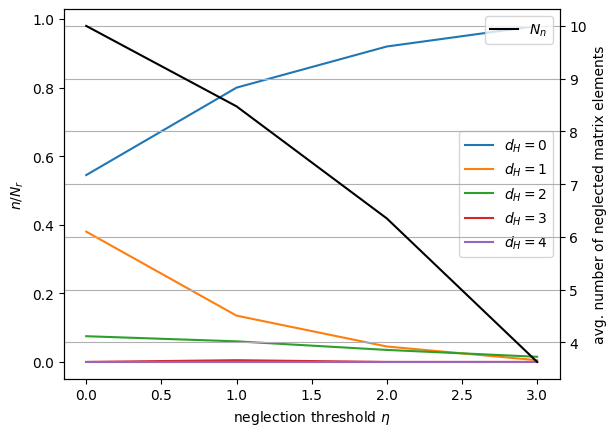

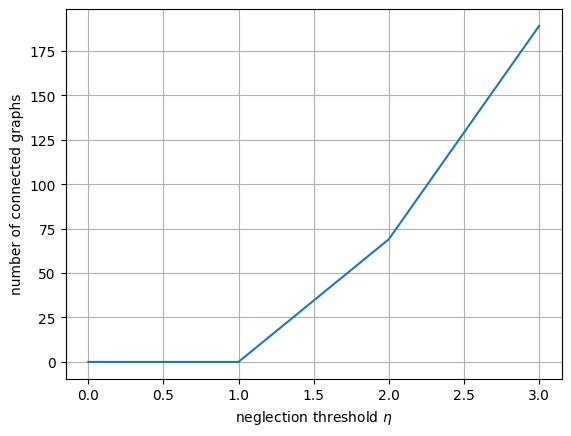

In [ ]:
print(f"The function hamming_distance_distribution has with the selected settings an average runtime of ({np.mean(runtime_hdd):.3f} +- {np.std(runtime_hdd):.3f})s.")
#print("Note: in approx. 6% of cases, QuTip does not converge.")        # this is not important because the converging happens when calculating the complete time evolution. However, the function hamming_distance_distribution deactivates this calculation as it is not necessary for the determination of the Hamming distance.

# ---------- Plotting ----------
# Hamming distances
fig = plt.figure()
axl = fig.add_subplot()
axr = axl.twinx()


for j in range(N):
    axl.plot(neglection_thres, n[:, j]/N_repeat, label=rf"$d_H={d[j]}$")
axl.set_xlabel(r"neglection threshold $\eta$")
axl.set_ylabel(r"$n/N_r$")
axl.legend()

axr.plot(neglection_thres, N_n, label=r"$N_n$", color="black")
axr.set_ylabel("avg. number of neglected matrix elements")
axr.legend()

plt.legend()
plt.grid()
plt.show()


plt.plot(neglection_thres, connected_counter)
plt.xlabel(r"neglection threshold $\eta$")
plt.ylabel("number of connected graphs")
plt.grid()
plt.show()

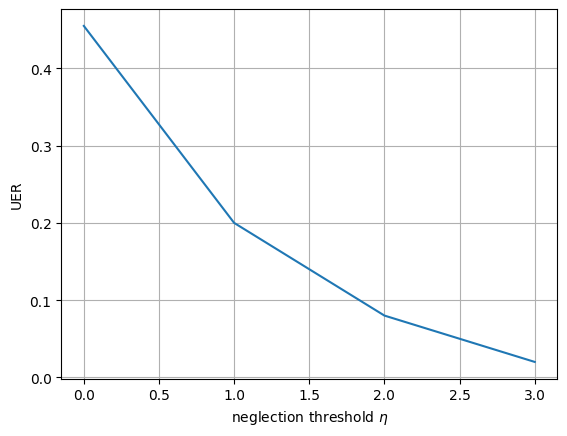

In [ ]:
# complete user error rate between both annealing results (nothing new - just the same data represented differently)
plt.plot(neglection_thres, 1-n[:, 0]/N_repeat)
plt.xlabel(r"neglection threshold $\eta$")
plt.ylabel("UER")
plt.grid()
plt.show()
# note: The UER in this case is the UER between the detection result of the annealing with neglected and without neglected matrix elements. Thus, it starts at zero. However, the detection without neglected matrix elements might also have a certain error rate.
